In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Import two datesets 
colnames = ["LOAN_ID", "ORIG_CHN", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE","FRST_DTE", "OLTV", 
            "OCLTV", "NUM_BO", "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", "PROP_TYP","NUM_UNIT", "OCC_STAT", 
            "STATE", "ZIP_3", "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", "RELOCATION_FLG"]
Data_A = pd.read_table('D:/1-Intern/Project_1/2018Q1/Acquisition_2018Q1.txt', 
                       sep = '|', header = None, names = colnames)
colnames_P = ["LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
              "Adj.Month.To.Mat", "Maturity.Date", "MSA", "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
              "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", "FCC_COST", "PP_COST", "AR_COST", "IE_COST", "TAX_COST", "NS_PROCS",
              "CE_PROCS", "RMW_PROCS", "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"]
Data_P = pd.read_table('D:/1-Intern/Project_1/2018Q1/Performance_2018Q1.txt', 
                       sep = '|', header = None, names = colnames_P,low_memory=False)

In [4]:
# Convert string into datetime
from datetime import datetime
Data_P['Monthly.Rpt.Prd']= [datetime.strptime(x, '%m/%d/%Y') for x in Data_P.loc[:, 'Monthly.Rpt.Prd']]

In [5]:
Data_P['Delq.Status_D90']= Data_P['Delq.Status'].replace(['1','2','X'], '0')

In [6]:
Data_P['Delq.Status_D90'] = Data_P['Delq.Status_D90'].replace(['3','4','5','6','7','8','9','10','11','12',
                                                     '13','14','15','16','17','18','19','20','21','22'], '1')

In [9]:
Data_P['Delq.Status_D90'].value_counts()

0    9318346
1      13567
Name: Delq.Status_D90, dtype: int64

In [11]:
# Data_P['Delq.Status_D90'] is object datatype, so it should be converted to integer. 
Data_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332050 entries, 0 to 9332049
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   LOAN_ID              int64         
 1   Monthly.Rpt.Prd      datetime64[ns]
 2   Servicer.Name        object        
 3   LAST_RT              float64       
 4   LAST_UPB             float64       
 5   Loan.Age             int64         
 6   Months.To.Legal.Mat  int64         
 7   Adj.Month.To.Mat     float64       
 8   Maturity.Date        object        
 9   MSA                  int64         
 10  Delq.Status          object        
 11  MOD_FLAG             object        
 12  Zero.Bal.Code        float64       
 13  ZB_DTE               object        
 14  LPI_DTE              object        
 15  FCC_DTE              object        
 16  DISP_DT              object        
 17  FCC_COST             float64       
 18  PP_COST              float64       
 19  AR_COST              

In [7]:
Data_P['Delq.Status_D90']=pd.to_numeric(Data_P['Delq.Status_D90'])

In [8]:
Flag_90 = Data_P['Delq.Status_D90'].groupby(Data_P['LOAN_ID']).sum()

In [9]:
Flag_90 = pd.DataFrame(Flag_90)
Flag_90.head 

<bound method NDFrame.head of               Delq.Status_D90
LOAN_ID                      
100001040173              0.0
100002370993              0.0
100005405807              0.0
100008071646              0.0
100010739040              0.0
...                       ...
999991303485              0.0
999992661330              0.0
999995056050              0.0
999997685206              0.0
999998783494              0.0

[426206 rows x 1 columns]>

In [10]:
Flag_90 = Flag_90.reset_index()

In [11]:
Flag_90.head

<bound method NDFrame.head of              LOAN_ID  Delq.Status_D90
0       100001040173              0.0
1       100002370993              0.0
2       100005405807              0.0
3       100008071646              0.0
4       100010739040              0.0
...              ...              ...
426201  999991303485              0.0
426202  999992661330              0.0
426203  999995056050              0.0
426204  999997685206              0.0
426205  999998783494              0.0

[426206 rows x 2 columns]>

In [13]:
Flag_90['Delq.Status_D90'].value_counts()

0.0     423359
1.0        636
2.0        374
4.0        337
3.0        283
5.0        265
6.0        206
8.0        162
7.0        151
9.0        104
11.0        75
10.0        74
12.0        45
13.0        40
14.0        25
16.0        20
15.0        20
18.0        13
17.0        10
20.0         4
19.0         3
Name: Delq.Status_D90, dtype: int64

In [12]:
Flag_90['Delq.Status_D90']= Flag_90.loc[:,'Delq.Status_D90'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 1)

In [13]:
Flag_90['Delq.Status_D90'].value_counts()

0.0    423359
1.0      2847
Name: Delq.Status_D90, dtype: int64

In [14]:
df = pd.merge(Data_A, Flag_90, on = 'LOAN_ID')

In [15]:
#Date exploration - Predictor Variables
## 1: usually 'Seller.Name' is not related to model, so drop it.
df = df.drop(columns = 'Seller.Name')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426206 entries, 0 to 426205
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LOAN_ID          426206 non-null  int64  
 1   ORIG_CHN         426206 non-null  object 
 2   ORIG_RT          426206 non-null  float64
 3   ORIG_AMT         426206 non-null  int64  
 4   ORIG_TRM         426206 non-null  int64  
 5   ORIG_DTE         426206 non-null  object 
 6   FRST_DTE         426206 non-null  object 
 7   OLTV             426206 non-null  int64  
 8   OCLTV            426205 non-null  float64
 9   NUM_BO           426206 non-null  int64  
 10  DTI              426095 non-null  float64
 11  CSCORE_B         425870 non-null  float64
 12  FTHB_FLG         426206 non-null  object 
 13  PURPOSE          426206 non-null  object 
 14  PROP_TYP         426206 non-null  object 
 15  NUM_UNIT         426206 non-null  int64  
 16  OCC_STAT         426206 non-null  obje

In [35]:
# Browse dataset
df.head(10)

,LOAN_ID,ORIG_CHN,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,NUM_BO,...,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product.Type,CSCORE_C,MI_TYPE,RELOCATION_FLG,Delq.Status_D90
0,100001040173,R,4.250,453000,360,01/2018,03/2018,65,65.0,1,...,1,P,OH,430,NaN,FRM,NaN,NaN,N,0.0
1,100002370993,C,4.250,266000,360,01/2018,03/2018,80,80.0,2,...,1,P,IN,467,NaN,FRM,793.0,NaN,N,0.0
2,100005405807,R,3.990,233000,360,12/2017,01/2018,79,79.0,2,...,1,P,CA,936,NaN,FRM,665.0,NaN,N,0.0
3,100008071646,R,4.250,184000,360,01/2018,03/2018,80,80.0,1,...,1,P,FL,336,NaN,FRM,NaN,NaN,N,0.0
4,100010739040,R,4.250,242000,360,02/2018,04/2018,49,49.0,1,...,1,P,CA,906,NaN,FRM,NaN,NaN,N,0.0
5,100012691523,R,5.375,180000,360,01/2018,03/2018,80,80.0,1,...,1,P,OK,730,NaN,FRM,NaN,NaN,N,0.0
6,100020244091,R,4.875,140000,360,01/2018,03/2018,39,39.0,2,...,1,P,PA,189,NaN,FRM,782.0,NaN,N,0.0
7,100020295408,R,4.875,150000,360,02/2018,04/2018,69,69.0,1,...,1,P,TX,750,NaN,FRM,NaN,NaN,N,0.0
8,100021639708,R,3.990,227000,360,01/2018,03/2018,80,80.0,1,...,1,P,CO,809,NaN,FRM,NaN,NaN,N,0.0
9,100022479643,C,4.000,200000,360,11/2017,01/2018,80,80.0,1,...,1,P,MD,210,NaN,FRM,NaN,NaN,N,0.0


In [36]:
#Show summary stat
df.describe()

,LOAN_ID,ORIG_RT,ORIG_AMT,ORIG_TRM,OLTV,OCLTV,NUM_BO,DTI,CSCORE_B,NUM_UNIT,ZIP_3,MI_PCT,CSCORE_C,MI_TYPE,Delq.Status_D90
count,4.262060e+05,426206.000000,4.262060e+05,426206.000000,426206.000000,426205.000000,426206.000000,426095.000000,425870.000000,426206.000000,426206.000000,114100.000000,190783.000000,114100.000000,426206.000000
mean,5.493219e+11,4.238443,2.333843e+05,325.526931,73.791671,74.266161,1.459100,36.268015,747.287456,1.032867,571.333658,24.472287,754.640225,1.113874,0.006680
std,2.597092e+11,0.466205,1.233285e+05,68.751308,17.309711,17.453830,0.521205,9.613616,47.840870,0.241871,299.502061,6.857250,45.866703,0.317659,0.081457
min,1.000010e+11,2.500000,1.000000e+04,60.000000,3.000000,3.000000,1.000000,1.000000,620.000000,1.000000,6.000000,6.000000,620.000000,1.000000,0.000000
25%,3.241691e+11,3.875000,1.390000e+05,360.000000,65.000000,65.000000,1.000000,29.000000,713.000000,1.000000,314.000000,25.000000,724.000000,1.000000,0.000000
50%,5.491542e+11,4.250000,2.100000e+05,360.000000,78.000000,79.000000,1.000000,38.000000,756.000000,1.000000,596.000000,25.000000,765.000000,1.000000,0.000000
75%,7.745372e+11,4.500000,3.070000e+05,360.000000,85.000000,86.000000,2.000000,44.000000,788.000000,1.000000,852.000000,30.000000,792.000000,1.000000,0.000000
max,9.999988e+11,6.250000,1.307000e+06,360.000000,97.000000,113.000000,6.000000,51.000000,835.000000,4.000000,999.000000,41.000000,837.000000,2.000000,1.000000


In [37]:
# Count missing values by column 
df.isnull().sum()

LOAN_ID                 0
ORIG_CHN                0
ORIG_RT                 0
ORIG_AMT                0
ORIG_TRM                0
ORIG_DTE                0
FRST_DTE                0
OLTV                    0
OCLTV                   1
NUM_BO                  0
DTI                   111
CSCORE_B              336
FTHB_FLG                0
PURPOSE                 0
PROP_TYP                0
NUM_UNIT                0
OCC_STAT                0
STATE                   0
ZIP_3                   0
MI_PCT             312106
Product.Type            0
CSCORE_C           235423
MI_TYPE            312106
RELOCATION_FLG          0
Delq.Status_D90         0
dtype: int64

In [38]:
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'ORIG_DTE',
       'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'FTHB_FLG',
       'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE', 'ZIP_3',
       'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE', 'RELOCATION_FLG',
       'Delq.Status_D90'],
      dtype='object')

In [16]:
# Explore Data 
## Numeric Variables
continous_cols = ['ORIG_RT', 'ORIG_AMT','OLTV','OCLTV', 'CSCORE_B', 'CSCORE_C','NUM_UNIT' ]


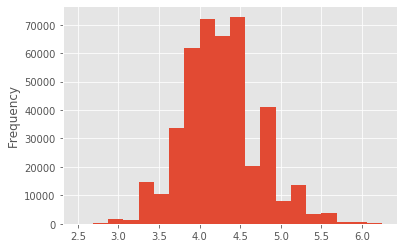

In [41]:
df['ORIG_RT'].plot.hist(bins=20)

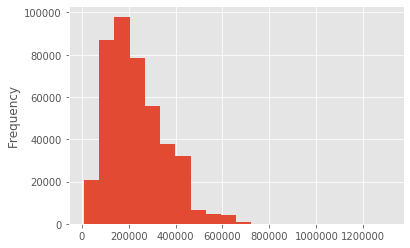

In [43]:
df['ORIG_AMT'].plot.hist(bins=20)

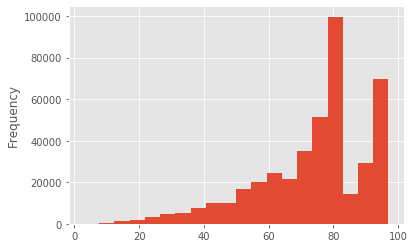

In [44]:
#From below two plots, we know there is high corelated between OLTV and OCLTV due to similar distribution
df['OLTV'].plot.hist(bins=20)

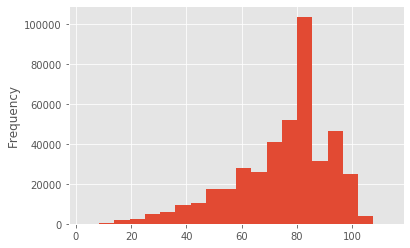

In [45]:
df['OCLTV'].plot.hist(bins=20)

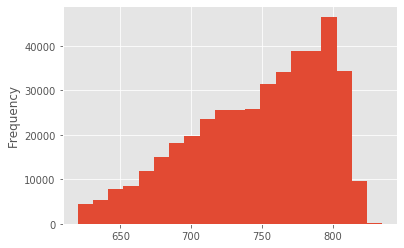

In [46]:
#From below two plot, we also could conclude that 'CSCORE_B' and 'CSCORE_C' have similar distribution 
df['CSCORE_B'].plot.hist(bins=20)

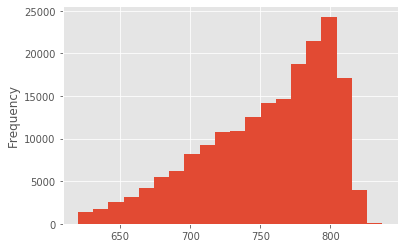

In [47]:
df['CSCORE_C'].plot.hist(bins=20)

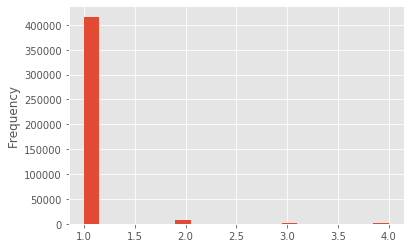

In [48]:
df['NUM_UNIT'].plot.hist(bins=20)

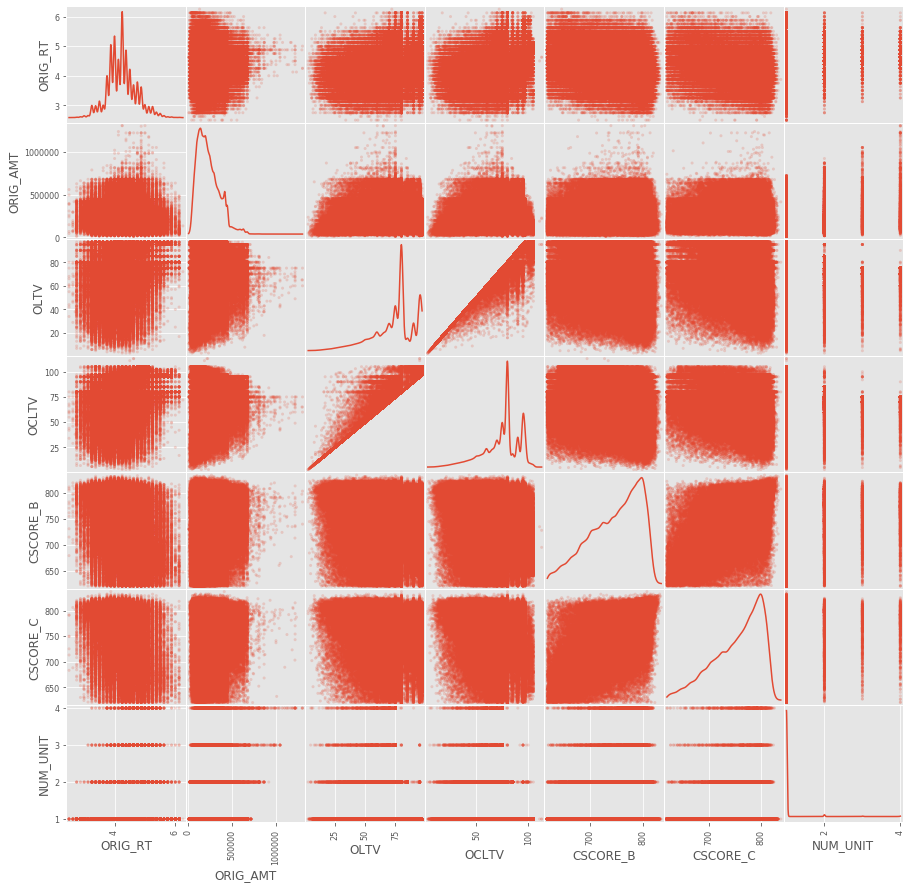

In [54]:
# Use scatter_matrix from Pandas
## From below scatter_matrix, we could know that there is a linear relationship between 'OLTV' and 'OCLTV'
from pandas.plotting import scatter_matrix
scatter_matrix(df[['ORIG_RT', 'ORIG_AMT','OLTV','OCLTV', 'CSCORE_B', 'CSCORE_C','NUM_UNIT']],
               alpha = 0.2, figsize=(15,15), diagonal = 'kde')
plt.show()

In [ ]:
# Categorical Variables

In [17]:
# Due to the large number of missing in  'MI_PCT','MI_TYPE',
categorical_col = ['ORIG_CHN', 'FTHB_FLG','PURPOSE','PROP_TYP','OCC_STAT','Product.Type','RELOCATION_FLG']

In [21]:
df['ORIG_CHN'].value_counts()

R    240940
C    146335
B     38931
Name: ORIG_CHN, dtype: int64

In [56]:
#Since there is one loan of FTHB_FLG is unknow, so it is better to drop this loan 
df['FTHB_FLG'].value_counts()


N    333461
Y     92744
U         1
Name: FTHB_FLG, dtype: int64

In [22]:
df.drop(df[df['FTHB_FLG']== 'U'].index, inplace=True)

In [23]:
df['FTHB_FLG'].value_counts()

N    333461
Y     92744
Name: FTHB_FLG, dtype: int64

In [24]:
df['PURPOSE'].value_counts()

P    219527
C    122895
R     83783
Name: PURPOSE, dtype: int64

In [58]:
df['PROP_TYP'].value_counts()

SF    264515
PU    115815
CO     40260
MH      3816
CP      1800
Name: PROP_TYP, dtype: int64

In [59]:
df['OCC_STAT'].value_counts()

P    372432
I     35734
S     18040
Name: OCC_STAT, dtype: int64

In [60]:
#There is only one categories in this variable, so it is not useful variable and won't be selected as a feature. 
df['Product.Type'].value_counts()

FRM    426206
Name: Product.Type, dtype: int64

In [61]:
df['RELOCATION_FLG'].value_counts()

N    423549
Y      2657
Name: RELOCATION_FLG, dtype: int64

In [25]:
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM', 'ORIG_DTE',
       'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'FTHB_FLG',
       'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE', 'ZIP_3',
       'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE', 'RELOCATION_FLG',
       'Delq.Status_D90'],
      dtype='object')

In [18]:
# In mortgage loan analysis, the minimum score of 'CSCORE_B','CSCORE_C' would be adopted in the model 
df['Credit_Score']= df[['CSCORE_B','CSCORE_C']].min(axis =1 )

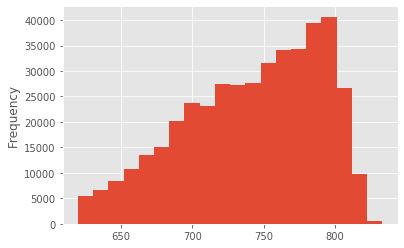

In [78]:
df['Credit_Score'].plot.hist(bins=20)

In [80]:
df[['Credit_Score','CSCORE_B','CSCORE_C']] .head

<bound method NDFrame.head of         Credit_Score  CSCORE_B  CSCORE_C
0              791.0     791.0       NaN
1              736.0     736.0     793.0
2              665.0     696.0     665.0
3              767.0     767.0       NaN
4              727.0     727.0       NaN
...              ...       ...       ...
426201         722.0     753.0     722.0
426202         747.0     747.0       NaN
426203         731.0     731.0       NaN
426204         767.0     774.0     767.0
426205         726.0     776.0     726.0

[426205 rows x 3 columns]>

# Build Logistic Regression Model
## Define Features and Target
### After preliminary analysis, we could temporarily select features 
Selected_Features = ['ORIG_RT', 'ORIG_AMT', 'OLTV', 'NUM_BO', 'DTI', 'Credit_Score', 'NUM_UNIT'，
              'ORIG_CHN', 'FTHB_FLG','PURPOSE', 'PROP_TYP', 'OCC_STAT', 'RELOCATION_FLG']
df_1 = df[Selected_Features]                     
X = df_1
y = df.loc[:,'Delq.Status_D90'].astype(int)

In [28]:
# Clean Data - deal with missing values
df[Selected_Features].isnull().sum()

ORIG_RT             0
ORIG_AMT            0
OLTV                0
NUM_BO              0
DTI               111
Credit_Score      235
NUM_UNIT            0
ORIG_CHN            0
FTHB_FLG            0
PURPOSE             0
PROP_TYP            0
OCC_STAT            0
RELOCATION_FLG      0
dtype: int64

In [20]:
# fill missing values with median
df['DTI']=df['DTI'].fillna(df['DTI'].median())
df['Credit_Score']=df['Credit_Score'].fillna(df['Credit_Score'].median())

In [21]:
df[Selected_Features].isnull().sum()

ORIG_RT           0
ORIG_AMT          0
OLTV              0
NUM_BO            0
DTI               0
Credit_Score      0
NUM_UNIT          0
ORIG_CHN          0
FTHB_FLG          0
PURPOSE           0
PROP_TYP          0
OCC_STAT          0
RELOCATION_FLG    0
dtype: int64

In [88]:
df[Selected_Features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426205 entries, 0 to 426205
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ORIG_RT         426205 non-null  float64
 1   ORIG_AMT        426205 non-null  int64  
 2   OLTV            426205 non-null  int64  
 3   NUM_BO          426205 non-null  int64  
 4   DTI             426205 non-null  float64
 5   Credit_Score    426205 non-null  float64
 6   NUM_UNIT        426205 non-null  int64  
 7   ORIG_CHN        426205 non-null  object 
 8   FTHB_FLG        426205 non-null  object 
 9   PURPOSE         426205 non-null  object 
 10  PROP_TYP        426205 non-null  object 
 11  OCC_STAT        426205 non-null  object 
 12  RELOCATION_FLG  426205 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 45.5+ MB


In [24]:
# Convert categorical variables: 'ORIG_CHN', 'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'OCC_STAT', 'RELOCATION_FLG'
## Encode categorical columns to numeric values

df_1= pd.get_dummies(df_1,columns= ['ORIG_CHN', 'FTHB_FLG','PURPOSE','PROP_TYP','OCC_STAT','RELOCATION_FLG']) 

# Logistic Regression in SatsModels Package before normalization 
import numpy as np
import statsmodels.api as sm

In [27]:
x = X
x = sm.add_constant(x)

In [36]:
model_1 = sm.Logit(y,x)
result = model_1.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.034915
         Iterations 11


In [37]:
result.params

const               1.009087e+01
ORIG_RT             5.166265e-01
ORIG_AMT           -2.949363e-07
OLTV                1.789137e-02
NUM_BO             -8.885465e-01
DTI                 2.743655e-02
Credit_Score       -1.907252e-02
NUM_UNIT           -8.301186e-02
ORIG_CHN_B         -4.479017e+00
ORIG_CHN_C         -4.381947e+00
ORIG_CHN_R         -4.589704e+00
FTHB_FLG_N         -1.890878e+00
FTHB_FLG_Y         -1.696354e+00
PURPOSE_C          -1.599474e+00
PURPOSE_P          -1.688725e+00
PURPOSE_R          -1.711097e+00
PROP_TYP_CO         9.848677e-01
PROP_TYP_CP         6.699058e-01
PROP_TYP_MH         1.283392e+00
PROP_TYP_PU         1.095715e+00
PROP_TYP_SF         1.269109e+00
OCC_STAT_I          2.814900e-01
OCC_STAT_P          7.515671e-01
OCC_STAT_S          3.223741e-01
RELOCATION_FLG_N    1.286081e+00
RELOCATION_FLG_Y    6.934966e-02
dtype: float64

In [38]:
result.summary()

C:\Users\rhoda\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\rhoda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\rhoda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\rhoda\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Delq.Status_D90   No. Observations:               426205
Model:                          Logit   Df Residuals:                   426185
Method:                           MLE   Df Model:                           19
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.1296
Time:                        12:43:32   Log-Likelihood:                -14881.
converged:                       True   LL-Null:                       -17097.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.0909        nan        nan        nan         nan         nan
ORIG_RT              0.5166      0.045     11.507      0.000       0.429       0.605
ORIG_AMT         -2.949e-07   1.75e-07     -1.686      0.092   -6.38e-07    4.78e-08
OLTV                 0.0179      0.002     10.084      0.000       0.014       0.021
NUM_BO              -0.8885      0.044    -20.397      0.000      -0.974      -0.803
DTI                  0.0274      0.002     11.236      0.000       0.023       0.032
Credit_Score        -0.0191      0.000    -40.532      0.000      -0.020      -0.018
NUM_UNIT            -0.0830      0.108     -0.768      0.442      -0.295       0.129
ORIG_CHN_B          -4.4790        nan        nan        nan         nan         nan
ORIG_CHN_C          -4.3819   2.13e+05  -2.05e-05      1.000   -4.18e+05    4.18e+05
ORIG_CHN_R          -4.5897   1.45e+05  -3.17e-05      1.000   -2.84e+05    2.84e+05
FTHB_FLG_N          -1.8909        nan        nan        nan         nan         nan
FTHB_FLG_Y          -1.6964        nan        nan        nan         nan         nan
PURPOSE_C           -1.5995        nan        nan        nan         nan         nan
PURPOSE_P           -1.6887        nan        nan        nan         nan         nan
PURPOSE_R           -1.7111        nan        nan        nan         nan         nan
PROP_TYP_CO          0.9849        nan        nan        nan         nan         nan
PROP_TYP_CP          0.6699        nan        nan        nan         nan         nan
PROP_TYP_MH          1.2834        nan        nan        nan         nan         nan
PROP_TYP_PU          1.0957        nan        nan        nan         nan         nan
PROP_TYP_SF          1.2691        nan        nan        nan         nan         nan
OCC_STAT_I           0.2815   7.54e+05   3.73e-07      1.000   -1.48e+06    1.48e+06
OCC_STAT_P           0.7516   7.54e+05   9.97e-07      1.000   -1.48e+06    1.48e+06
OCC_STAT_S           0.3224   7.54e+05   4.28e-07      1.000   -1.48e+06    1.48e+06
RELOCATION_FLG_N     1.2861        nan        nan        nan         nan         nan
RELOCATION_FLG_Y     0.0693        nan        nan        nan         nan         nan
====================================================================================
"""

In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.130     
Dependent Variable:       Delq.Status_D90      AIC:                  29802.3193
Date:                     2020-07-13 12:43     BIC:                  30021.5728
No. Observations:         426205               Log-Likelihood:       -14881.   
Df Model:                 19                   LL-Null:              -17097.   
Df Residuals:             426185               LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           11.0000                                              
-------------------------------------------------------------------------------
                  Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------------
const            10.0909         nan      nan    nan           nan          nan
ORIG_RT           0.5166      0.0449  11.5071 0.0000        0.4286       0.6046
ORIG_AMT         -0.0000      0.0000  -1.6865 0.0917       -0.0000       0.0000
OLTV              0.0179      0.0018  10.0835 0.0000        0.0144       0.0214
NUM_BO           -0.8885      0.0436 -20.3967 0.0000       -0.9739      -0.8032
DTI               0.0274      0.0024  11.2363 0.0000        0.0227       0.0322
Credit_Score     -0.0191      0.0005 -40.5321 0.0000       -0.0200      -0.0182
NUM_UNIT         -0.0830      0.1080  -0.7683 0.4423       -0.2948       0.1288
ORIG_CHN_B       -4.4790         nan      nan    nan           nan          nan
ORIG_CHN_C       -4.3819 213372.7190  -0.0000 1.0000  -418207.2265  418198.4626
ORIG_CHN_R       -4.5897 144746.9092  -0.0000 1.0000  -283703.3186  283694.1392
FTHB_FLG_N       -1.8909         nan      nan    nan           nan          nan
FTHB_FLG_Y       -1.6964         nan      nan    nan           nan          nan
PURPOSE_C        -1.5995         nan      nan    nan           nan          nan
PURPOSE_P        -1.6887         nan      nan    nan           nan          nan
PURPOSE_R        -1.7111         nan      nan    nan           nan          nan
PROP_TYP_CO       0.9849         nan      nan    nan           nan          nan
PROP_TYP_CP       0.6699         nan      nan    nan           nan          nan
PROP_TYP_MH       1.2834         nan      nan    nan           nan          nan
PROP_TYP_PU       1.0957         nan      nan    nan           nan          nan
PROP_TYP_SF       1.2691         nan      nan    nan           nan          nan
OCC_STAT_I        0.2815 753951.4455   0.0000 1.0000 -1477717.3978 1477717.9608
OCC_STAT_P        0.7516 753980.3208   0.0000 1.0000 -1477773.5222 1477775.0253
OCC_STAT_S        0.3224 753987.4054   0.0000 1.0000 -1477787.8370 1477788.4818
RELOCATION_FLG_N  1.2861         nan      nan    nan           nan          nan
RELOCATION_FLG_Y  0.0693         nan      nan    nan           nan          nan
===============================================================================

"""

# Normalized all continous variables 
x_1 = X
Continous_Var = ['ORIG_RT','ORIG_AMT', 'OLTV', 'DTI','Credit_Score']
x_1[Continous_Var]= (x_1[Continous_Var]-x_1[Continous_Var].mean())/x_1[Continous_Var].std()


In [ ]:
# sns.distplot(x_1[Continous_Var])

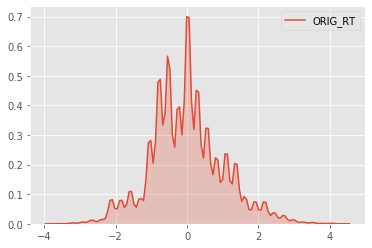

In [121]:
sns.kdeplot(x_1['ORIG_RT'], shade=True)

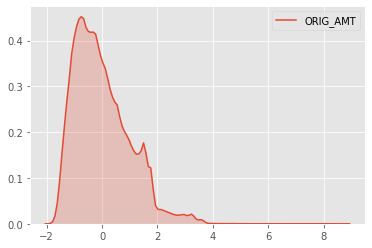

In [122]:
sns.kdeplot(x_1['ORIG_AMT'], shade=True)

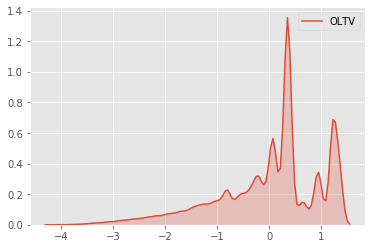

In [123]:
sns.kdeplot(x_1['OLTV'],shade=True)

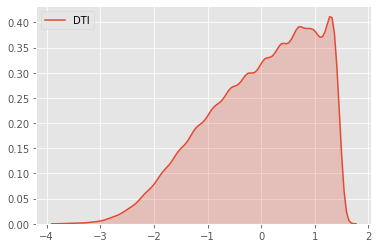

In [124]:
sns.kdeplot(x_1['DTI'],shade=True)

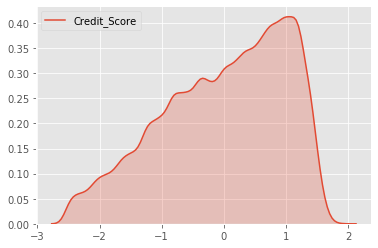

In [126]:
sns.kdeplot(x_1['Credit_Score'],shade=True)

# After normalization, try to build up Logistic Regression again 
x_1 = sm.add_constant(x_1)
model_2 = sm.Logit(y,x_1)
result_2 = model_2.fit(method = 'newton')

In [31]:
result_2.params

const              -11.589481
ORIG_RT              0.240854
ORIG_AMT            -0.036374
OLTV                 0.309694
NUM_BO              -0.888546
DTI                  0.263731
Credit_Score        -0.917927
NUM_UNIT            -0.083012
ORIG_CHN_B           6.234008
ORIG_CHN_C           6.331078
ORIG_CHN_R           6.123321
FTHB_FLG_N           7.038676
FTHB_FLG_U         -24.393280
FTHB_FLG_Y           7.233201
PURPOSE_C           -3.631197
PURPOSE_P           -3.720448
PURPOSE_R           -3.742821
PROP_TYP_CO          0.834407
PROP_TYP_CP          0.519445
PROP_TYP_MH          1.132931
PROP_TYP_PU          0.945255
PROP_TYP_SF          1.118649
OCC_STAT_I          -1.916246
OCC_STAT_P          -1.446169
OCC_STAT_S          -1.875362
RELOCATION_FLG_N    -2.010522
RELOCATION_FLG_Y    -3.227253
dtype: float64

In [44]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Delq.Status_D90   No. Observations:               426205
Model:                          Logit   Df Residuals:                   426185
Method:                           MLE   Df Model:                           19
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.1296
Time:                        12:44:07   Log-Likelihood:                -14881.
converged:                       True   LL-Null:                       -17097.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -20.5954   3.73e+06  -5.52e-06      1.000   -7.31e+06    7.31e+06
ORIG_RT              0.2409      0.021     11.507      0.000       0.200       0.282
ORIG_AMT            -0.0364      0.022     -1.686      0.092      -0.079       0.006
OLTV                 0.3097      0.031     10.084      0.000       0.249       0.370
NUM_BO              -0.8885      0.044    -20.397      0.000      -0.974      -0.803
DTI                  0.2637      0.023     11.236      0.000       0.218       0.310
Credit_Score        -0.9179      0.023    -40.532      0.000      -0.962      -0.874
NUM_UNIT            -0.0830      0.108     -0.768      0.442      -0.295       0.129
ORIG_CHN_B           6.0729   1.11e+06   5.49e-06      1.000   -2.17e+06    2.17e+06
ORIG_CHN_C           6.1700   1.08e+06   5.69e-06      1.000   -2.12e+06    2.12e+06
ORIG_CHN_R           5.9622   1.11e+06   5.37e-06      1.000   -2.17e+06    2.17e+06
FTHB_FLG_N           4.3739        nan        nan        nan         nan         nan
FTHB_FLG_Y           4.5684        nan        nan        nan         nan         nan
PURPOSE_C            2.7721    1.8e+06   1.54e-06      1.000   -3.52e+06    3.52e+06
PURPOSE_P            2.6828   1.82e+06   1.47e-06      1.000   -3.57e+06    3.57e+06
PURPOSE_R            2.6604    1.8e+06   1.48e-06      1.000   -3.53e+06    3.53e+06
PROP_TYP_CO          3.2984    1.9e+06   1.74e-06      1.000   -3.72e+06    3.72e+06
PROP_TYP_CP          2.9834   1.91e+06   1.56e-06      1.000   -3.74e+06    3.74e+06
PROP_TYP_MH          3.5969   1.91e+06   1.89e-06      1.000   -3.74e+06    3.74e+06
PROP_TYP_PU          3.4092   1.92e+06   1.77e-06      1.000   -3.77e+06    3.77e+06
PROP_TYP_SF          3.5826   1.91e+06   1.88e-06      1.000   -3.74e+06    3.74e+06
OCC_STAT_I          -0.7304   1.85e+06  -3.94e-07      1.000   -3.63e+06    3.63e+06
OCC_STAT_P          -0.2603   1.85e+06  -1.41e-07      1.000   -3.63e+06    3.63e+06
OCC_STAT_S          -0.6895   1.85e+06  -3.72e-07      1.000   -3.63e+06    3.63e+06
RELOCATION_FLG_N    -0.2318        nan        nan        nan         nan         nan
RELOCATION_FLG_Y    -1.4485        nan        nan        nan         nan         nan
====================================================================================
"""

In [46]:
result_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.130     
Dependent Variable:       Delq.Status_D90       AIC:                   29802.3193
Date:                     2020-07-13 12:44      BIC:                   30021.5728
No. Observations:         426205                Log-Likelihood:        -14881.   
Df Model:                 19                    LL-Null:               -17097.   
Df Residuals:             426185                LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           11.0000                                                
---------------------------------------------------------------------------------
                  Coef.     Std.Err.      z     P>|z|      [0.025       0.975]   
---------------------------------------------------------------------------------
const            -20.5954 3729057.1134  -0.0000 1.0000 -7308838.2339 7308797.0431
ORIG_RT            0.2409       0.0209  11.5071 0.0000        0.1998       0.2819
ORIG_AMT          -0.0364       0.0216  -1.6865 0.0917       -0.0786       0.0059
OLTV               0.3097       0.0307  10.0835 0.0000        0.2495       0.3699
NUM_BO            -0.8885       0.0436 -20.3967 0.0000       -0.9739      -0.8032
DTI                0.2637       0.0235  11.2363 0.0000        0.2177       0.3097
Credit_Score      -0.9179       0.0226 -40.5321 0.0000       -0.9623      -0.8735
NUM_UNIT          -0.0830       0.1080  -0.7683 0.4423       -0.2948       0.1288
ORIG_CHN_B         6.0729 1105422.8697   0.0000 1.0000 -2166582.9394 2166595.0851
ORIG_CHN_C         6.1700 1083666.5077   0.0000 1.0000 -2123941.1564 2123953.4963
ORIG_CHN_R         5.9622 1109600.3658   0.0000 1.0000 -2174770.7919 2174782.7163
FTHB_FLG_N         4.3739          nan      nan    nan           nan          nan
FTHB_FLG_Y         4.5684          nan      nan    nan           nan          nan
PURPOSE_C          2.7721 1797605.0759   0.0000 1.0000 -3523238.4351 3523243.9792
PURPOSE_P          2.6828 1822754.0430   0.0000 1.0000 -3572529.5941 3572534.9597
PURPOSE_R          2.6604 1800708.4252   0.0000 1.0000 -3529320.9996 3529326.3204
PROP_TYP_CO        3.2984 1897630.7400   0.0000 1.0000 -3719284.6079 3719291.2047
PROP_TYP_CP        2.9834 1907960.2874   0.0000 1.0000 -3739530.4639 3739536.4307
PROP_TYP_MH        3.5969 1907337.3681   0.0000 1.0000 -3738308.9510 3738316.1448
PROP_TYP_PU        3.4092 1923862.0947   0.0000 1.0000 -3770697.0076 3770703.8261
PROP_TYP_SF        3.5826 1908585.6952   0.0000 1.0000 -3740755.6415 3740762.8067
OCC_STAT_I        -0.7304 1852234.2353  -0.0000 1.0000 -3630313.1226 3630311.6617
OCC_STAT_P        -0.2603 1852389.1898  -0.0000 1.0000 -3630616.3578 3630615.8371
OCC_STAT_S        -0.6895 1852283.2046  -0.0000 1.0000 -3630409.0598 3630407.6807
RELOCATION_FLG_N  -0.2318          nan      nan    nan           nan          nan
RELOCATION_FLG_Y  -1.4485          nan      nan    nan           nan          nan
=================================================================================

"""

# Weighted Logistic Regression model by sklearn package
# Build Logistic Regression Model
## Define Features and Target
### After preliminary analysis, we could temporarily select features 
Selected_Features = ['ORIG_RT', 'ORIG_AMT', 'OLTV', 'NUM_BO', 'DTI', 'Credit_Score', 'NUM_UNIT'，
              'ORIG_CHN', 'FTHB_FLG','PURPOSE', 'PROP_TYP', 'OCC_STAT', 'RELOCATION_FLG']
df_1 = df[Selected_Features]                     
X = df_1
y = df.loc[:,'Delq.Status_D90'].astype(int)

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [38]:
X_train.head

<bound method NDFrame.head of          ORIG_RT  ORIG_AMT      OLTV  NUM_BO       DTI  Credit_Score  \
297997 -0.779579 -0.270694  0.300891       1  0.492232      1.372799   
408777 -0.243334 -0.238261  1.340769       1  0.596264      0.043018   
180822 -0.511456 -0.497730  1.340769       1  1.220458     -0.206315   
188881 -0.779579 -1.446416 -1.490012       1  0.388200     -1.452984   
387691  1.097278  0.483389  0.936372       1  1.116425     -1.806207   
...          ...       ...       ...     ...       ...           ...   
359783  0.024789 -0.886935 -0.103507       1 -1.380348     -0.289427   
358083  0.561033  2.518604  0.358662       2  1.428522      0.437797   
152315 -0.532906 -0.440971  0.647517       1  0.596264      0.957243   
117952  0.024789 -0.132851 -0.507904       2  0.180135     -1.058206   
305711 -0.511456 -0.359887  0.936372       2 -0.652123     -0.476427   

        NUM_UNIT  ORIG_CHN_B  ORIG_CHN_C  ORIG_CHN_R  ...  PROP_TYP_CO  \
297997         1           0   

In [33]:
from sklearn.linear_model import LogisticRegressionCV
weights = {0:1.0, 1:100.0}
model_3 = LogisticRegressionCV(10,class_weight=weights)
model_3.fit(X_train, y_train)


LogisticRegressionCV(Cs=10, class_weight={0: 1.0, 1: 100.0}, cv=None,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [34]:
model_3.predict_proba(X_train)

array([[0.87534306, 0.12465694],
       [0.56365125, 0.43634875],
       [0.50953275, 0.49046725],
       ...,
       [0.85793872, 0.14206128],
       [0.66059627, 0.33940373],
       [0.72439213, 0.27560787]])

In [235]:
# Make prediction on the training data
y_train_pred = model_3.predict(X_train)
p_train_pred = model_3.predict_proba(X_train)[:,1]

In [236]:
model_3.predict_proba(X_train)[:,1]

array([0.14220229, 0.16880475, 0.19460934, ..., 0.13380443, 0.33555597,
       0.12365373])

In [54]:
model_3.predict_proba(X_train)[:,1].mean()

0.28735508347450767

In [55]:
np.median(model_3.predict_proba(X_train)[:,1])


0.22762098300230635

In [56]:
# Make predictions on test data
y_test_pred = model_3.predict(X_test)
p_test_pred = model_3.predict_proba(X_test)[:,1]

In [238]:
model_3.predict_proba(X_test)[:,1]

array([0.30692338, 0.12209095, 0.83388248, ..., 0.09857999, 0.47884833,
       0.07594858])

In [57]:
model_3.predict_proba(X_test)[:,1].mean()

0.28776616640797403

In [58]:
np.median(model_3.predict_proba(X_test)[:,1])

0.22807829999003496

In [239]:
p_test_pred_1 = pd.DataFrame(p_test_pred)
p_test_pred_1

,0
0,0.306923
1,0.122091
2,0.833882
3,0.136144
4,0.272909
...,...
85236,0.330899
85237,0.051989
85238,0.098580
85239,0.478848


In [240]:
#Calculate the metric scores for the model
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [241]:
import pandas as pd
# Helper method to print metric scores
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [242]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred):
    roc_auc_train = roc_auc_score(y_train, p_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)

    roc_auc_test = roc_auc_score(y_test, p_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.826772  0.825552
Accuracy   0.819295  0.818702
Precision  0.023950  0.024740
Recall     0.660035  0.661538
f1-score   0.046223  0.047695


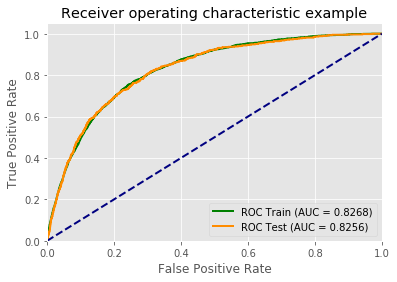

In [244]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

Text(0.5, 257.44, 'Predicted label')

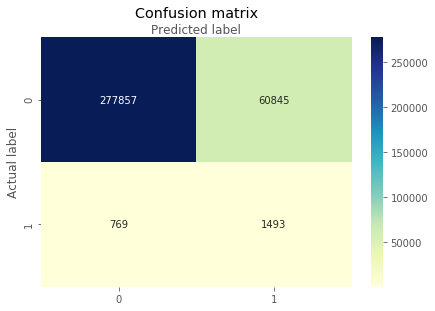

In [243]:
# Make prediction on the training data
y_train_pred_1 = model_3.predict(X_train)
p_train_pred_1 = model_3.predict_proba(X_train)

# Make predictions on test data
y_test_pred_1 = model_3.predict(X_test)
p_test_pred_1 = model_3.predict_proba(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_1)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

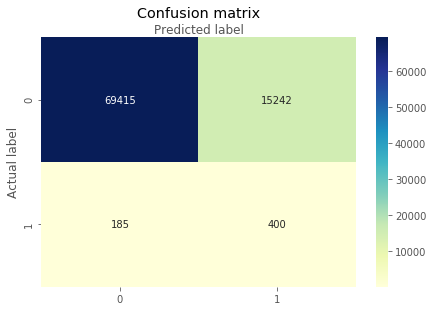

In [36]:
# Make prediction on the test data
y_train_pred_1 = model_3.predict(X_train)
p_train_pred_1 = model_3.predict_proba(X_train)

# Make predictions on test data
y_test_pred_1 = model_3.predict(X_test)
p_test_pred_1 = model_3.predict_proba(X_test)

from sklearn import metrics
cnf_matrix_1 = metrics.confusion_matrix(y_test, y_test_pred_1)
cnf_matrix_1

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [245]:
model_3.intercept_

array([-0.25919851])

In [252]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model_3.coef_))], axis = 1)
coefficients

,0,0
0,ORIG_RT,0.284188
1,ORIG_AMT,-0.094248
2,OLTV,0.268572
3,NUM_BO,-0.691659
4,DTI,0.270904
5,Credit_Score,-0.802800
6,NUM_UNIT,-0.067056
7,ORIG_CHN_B,-0.008971
8,ORIG_CHN_C,0.112475
9,ORIG_CHN_R,-0.103538


In [260]:
coefficients.columns = ['independent varaibles', 'coefficients']

In [262]:
coefficients.sort_values('coefficients', ascending = False)

,independent varaibles,coefficients
0,ORIG_RT,0.284188
4,DTI,0.270904
2,OLTV,0.268572
21,OCC_STAT_P,0.197050
19,PROP_TYP_SF,0.134569
8,ORIG_CHN_C,0.112475
11,FTHB_FLG_Y,0.067425
12,PURPOSE_C,0.034818
23,RELOCATION_FLG_N,0.017765
17,PROP_TYP_MH,-0.004795


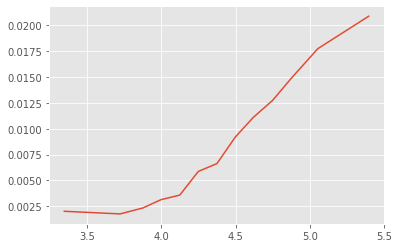

In [253]:
# Feature variable validation 
# ORIG_RT = 0.284188

a=df.groupby(pd.qcut(df['ORIG_RT'],20,duplicates = 'drop'))[['ORIG_RT','Delq.Status_D90']].mean()
plt.plot(a['ORIG_RT'],a['Delq.Status_D90'])

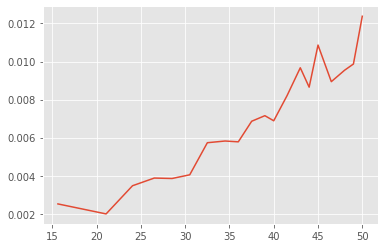

In [255]:
# DTI=0.270904

b=df.groupby(pd.qcut(df['DTI'],20,duplicates = 'drop'))[['DTI','Delq.Status_D90']].mean()
plt.plot(b['DTI'],b['Delq.Status_D90'])

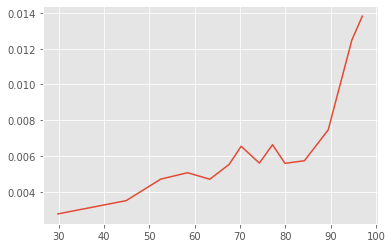

In [254]:
# OLTV= 0.268572
b=df.groupby(pd.qcut(df['OLTV'],20,duplicates = 'drop'))[['OLTV','Delq.Status_D90']].mean()
plt.plot(b['OLTV'],b['Delq.Status_D90'])

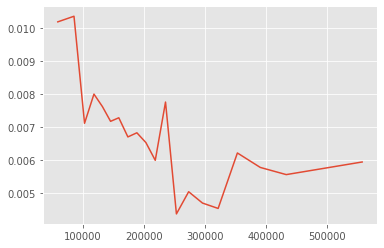

In [256]:
# ORIG_AMT= -0.094248
b=df.groupby(pd.qcut(df['ORIG_AMT'],20,duplicates = 'drop'))[['ORIG_AMT','Delq.Status_D90']].mean()
plt.plot(b['ORIG_AMT'],b['Delq.Status_D90'])

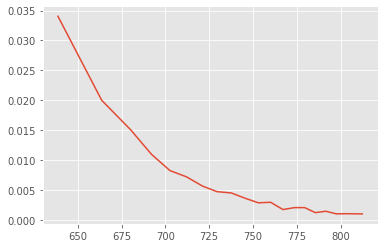

In [257]:
# Credit_Score = -0.802800
b=df.groupby(pd.qcut(df['Credit_Score'],20,duplicates = 'drop'))[['Credit_Score','Delq.Status_D90']].mean()
plt.plot(b['Credit_Score'],b['Delq.Status_D90'])

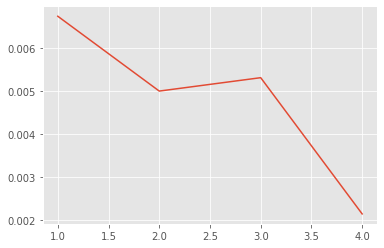

In [258]:
# NUM_UNIT = -0.067056
b=df.groupby(df['NUM_UNIT'])[['NUM_UNIT','Delq.Status_D90']].mean()
plt.plot(b['NUM_UNIT'],b['Delq.Status_D90'])

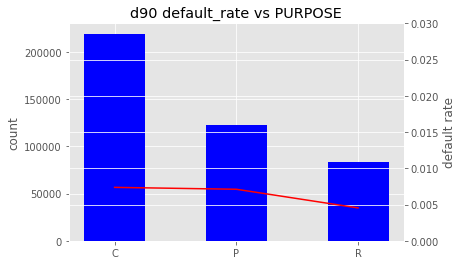

In [268]:
# PURPOSE_C= 0.034818
# PURPOSE_P= -0.028033
# PURPOSE_R= -0.006818
fig = plt.figure()
ax1 = fig.add_subplot(111)
d = df['PURPOSE'].value_counts()
ax1.bar(d.index,d, color = 'blue', width = 0.5)
ax1.set_ylabel('count')
ax2 = ax1.twinx()
c = df.groupby(['PURPOSE'],as_index=False)[['Delq.Status_D90']].mean()
ax2.plot(c['PURPOSE'],c['Delq.Status_D90'],color='red')
ax2.set_ylim([0, 0.03])
ax2.set_ylabel('default rate')
plt.title("d90 default_rate vs PURPOSE" )
plt.xlabel(col, fontsize =12)
plt.show()

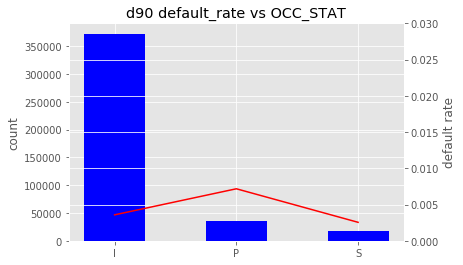

In [267]:
# OCC_STAT_P= 0.197050
# OCC_STAT_I= -0.138042
# OCC_STAT_S=-0.059041
fig = plt.figure()
ax1 = fig.add_subplot(111)
d = df['OCC_STAT'].value_counts()
ax1.bar(d.index,d, color = 'blue', width = 0.5)
ax1.set_ylabel('count')
ax2 = ax1.twinx()
c = df.groupby(['OCC_STAT'],as_index=False)[['Delq.Status_D90']].mean()
ax2.plot(c['OCC_STAT'],c['Delq.Status_D90'],color='red')
ax2.set_ylim([0, 0.03])
ax2.set_ylabel('default rate')
plt.title("d90 default_rate vs OCC_STAT")
plt.xlabel(col, fontsize =12)
plt.show()

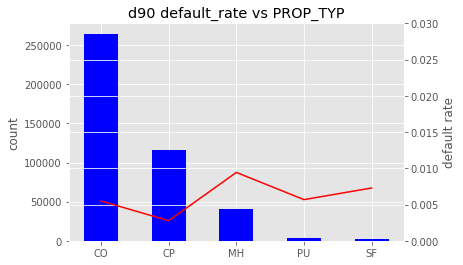

In [269]:
#PROP_TYP_CO = -0.066591
#PROP_TYP_CP = -0.010086
#PROP_TYP_MH = -0.004795
#PROP_TYP_PU = -0.053131
#PROP_TYP_SF = 0.134569

fig = plt.figure()
ax1 = fig.add_subplot(111)
d = df['PROP_TYP'].value_counts()
ax1.bar(d.index,d, color = 'blue', width = 0.5)
ax1.set_ylabel('count')
ax2 = ax1.twinx()
c = df.groupby(['PROP_TYP'],as_index=False)[['Delq.Status_D90']].mean()
ax2.plot(c['PROP_TYP'],c['Delq.Status_D90'],color='red')
ax2.set_ylim([0, 0.03])
ax2.set_ylabel('default rate')
plt.title("d90 default_rate vs PROP_TYP" )
plt.xlabel(col, fontsize =12)
plt.show()

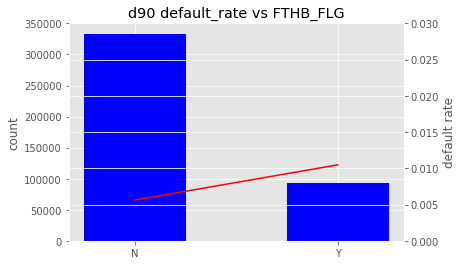

In [270]:
# FTHB_FLG_N = -0.067459
# FTHB_FLG_Y = 0.067425

fig = plt.figure()
ax1 = fig.add_subplot(111)
d = df['FTHB_FLG'].value_counts()
ax1.bar(d.index,d, color = 'blue', width = 0.5)
ax1.set_ylabel('count')
ax2 = ax1.twinx()
c = df.groupby(['FTHB_FLG'],as_index=False)[['Delq.Status_D90']].mean()
ax2.plot(c['FTHB_FLG'],c['Delq.Status_D90'],color='red')
ax2.set_ylim([0, 0.03])
ax2.set_ylabel('default rate')
plt.title("d90 default_rate vs FTHB_FLG" )
plt.xlabel(col, fontsize =12)
plt.show()

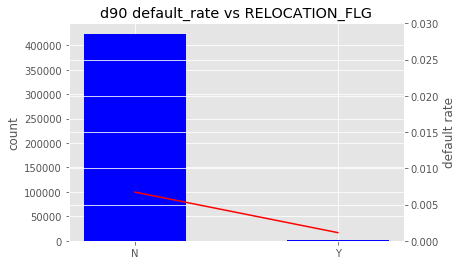

In [271]:
# RELOCATION_FLG_N = 0.017765
# RELOCATION_FLG_Y = -0.017798
# Qeustion: because the proportion of RELOCATION_FLG_Y is very small, should it be dropped out the model? 
fig = plt.figure()
ax1 = fig.add_subplot(111)
d = df['RELOCATION_FLG'].value_counts()
ax1.bar(d.index,d, color = 'blue', width = 0.5)
ax1.set_ylabel('count')
ax2 = ax1.twinx()
c = df.groupby(['RELOCATION_FLG'],as_index=False)[['Delq.Status_D90']].mean()
ax2.plot(c['RELOCATION_FLG'],c['Delq.Status_D90'],color='red')
ax2.set_ylim([0, 0.03])
ax2.set_ylabel('default rate')
plt.title("d90 default_rate vs RELOCATION_FLG" )
plt.xlabel(col, fontsize =12)
plt.show()

In [232]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# generate dataset
X, y = make_classification(n_samples=426206, n_features=24, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)
# define model
model = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:1,1:100}, {0:1,1:150}, {0:1,1:200}, {0:1,1:250}, {0:1,1:300}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967217 using {'class_weight': {0: 1, 1: 100}}
0.967217 (0.001854) with: {'class_weight': {0: 1, 1: 100}}
0.967067 (0.001851) with: {'class_weight': {0: 1, 1: 150}}
0.966945 (0.001853) with: {'class_weight': {0: 1, 1: 200}}
0.966840 (0.001856) with: {'class_weight': {0: 1, 1: 250}}
0.966752 (0.001859) with: {'class_weight': {0: 1, 1: 300}}
